   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              400 non-null    int64 
 1   Gender                  400 non-null    object
 2   Age                     400 non-null    int64 
 3   Annual Income (k$)      400 non-null    int64 
 4   Spending Score (1-100)  400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
       CustomerID         Age  Annual Income (k$) 

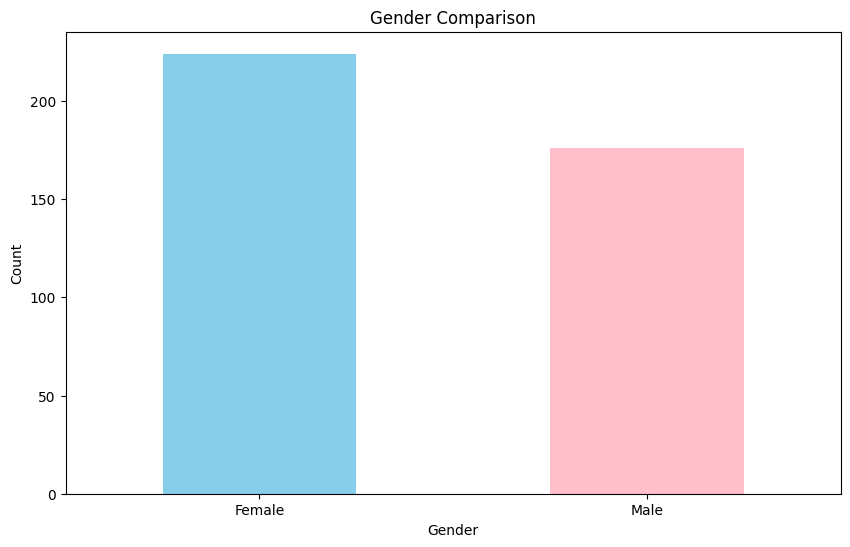

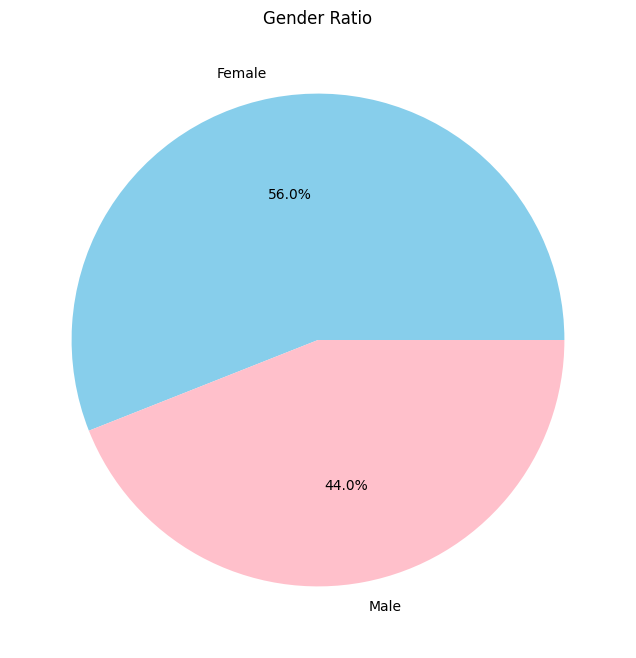

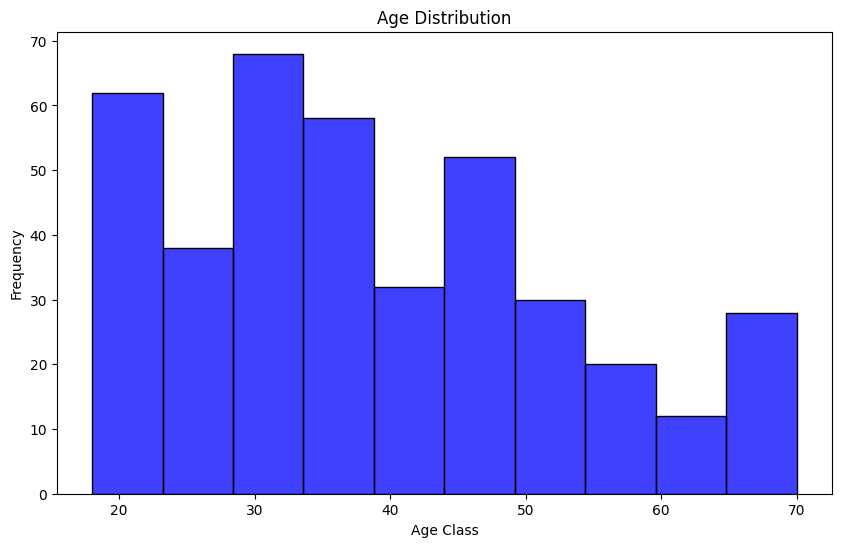

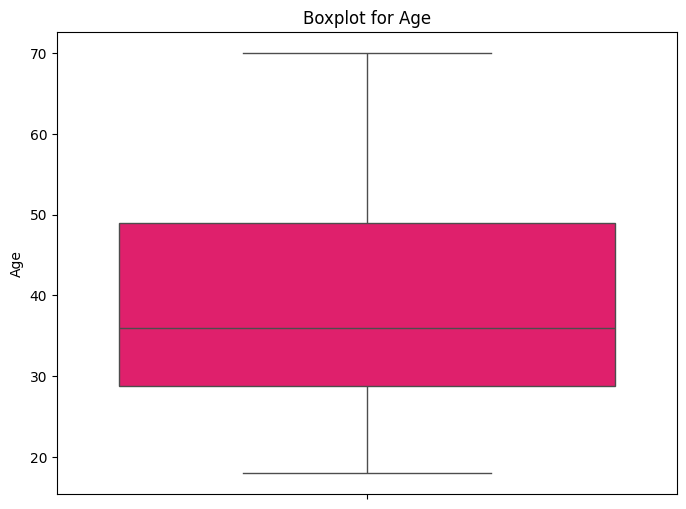

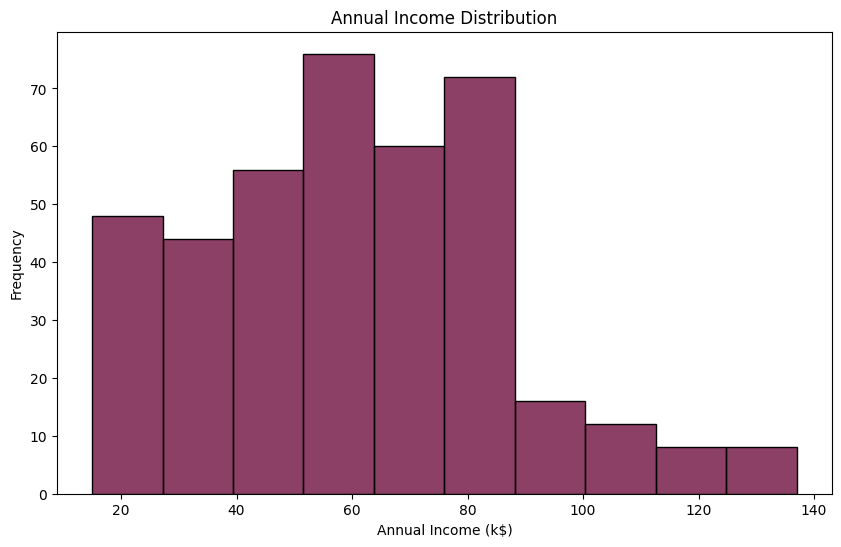

C:\Users\saite\AppData\Local\Temp\ipykernel_27528\3059237979.py:66: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, color='yellow')


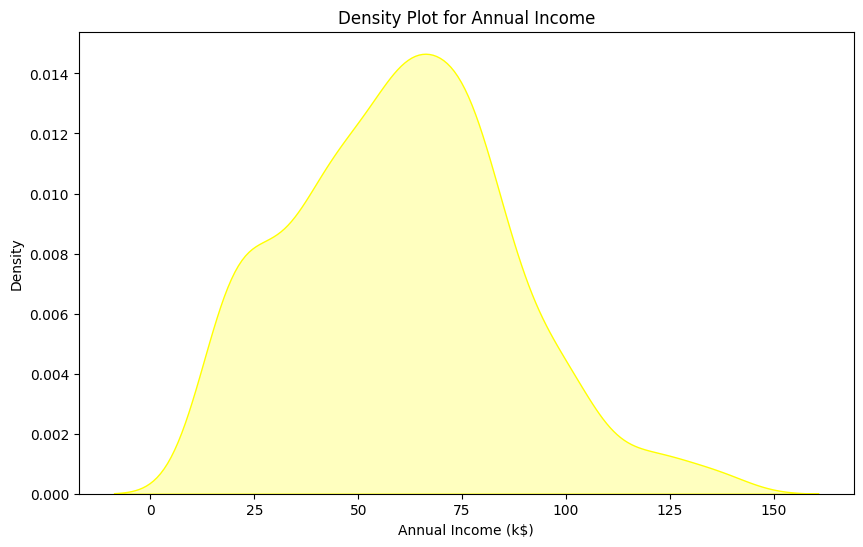

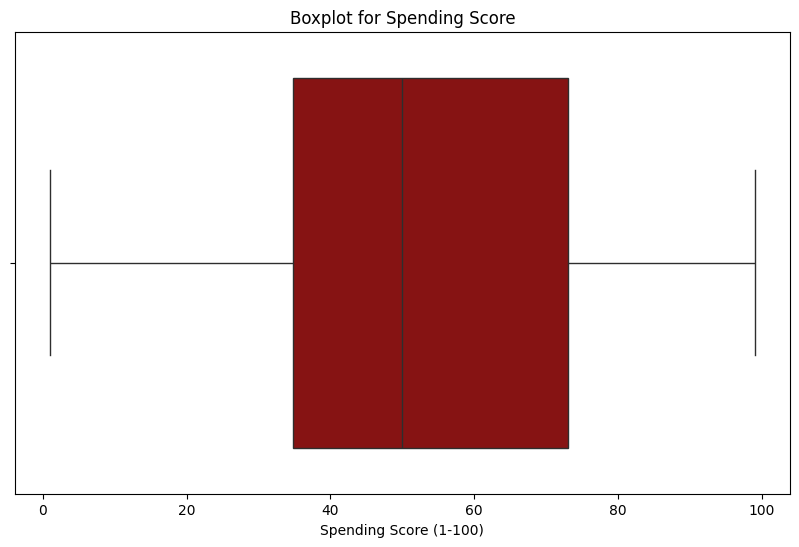

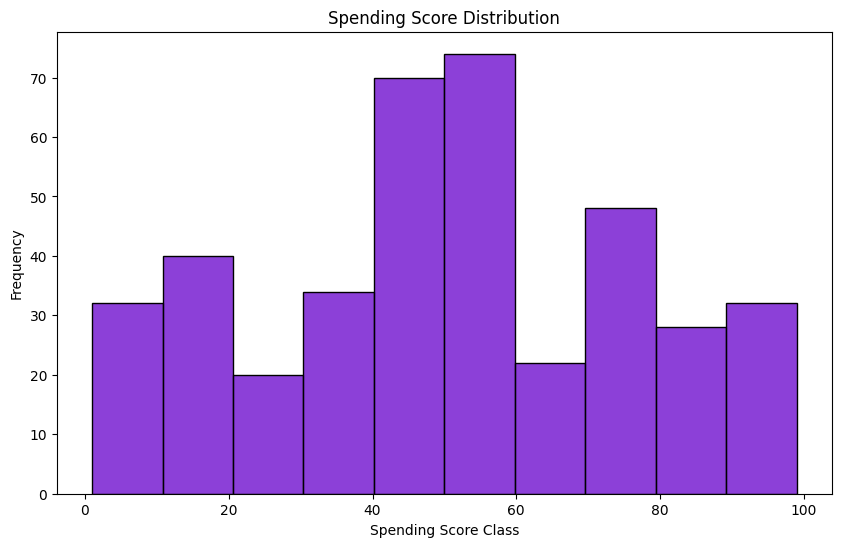

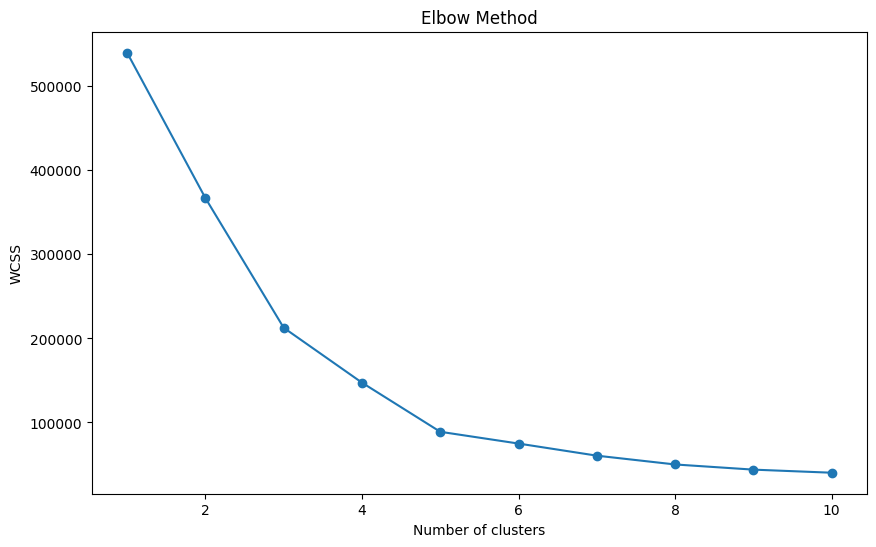

For n_clusters=2, the silhouette score is 0.3920
For n_clusters=3, the silhouette score is 0.4713
For n_clusters=4, the silhouette score is 0.4981
For n_clusters=5, the silhouette score is 0.5590
For n_clusters=6, the silhouette score is 0.5205
For n_clusters=7, the silhouette score is 0.5113
For n_clusters=8, the silhouette score is 0.5070
For n_clusters=9, the silhouette score is 0.4918
For n_clusters=10, the silhouette score is 0.4760


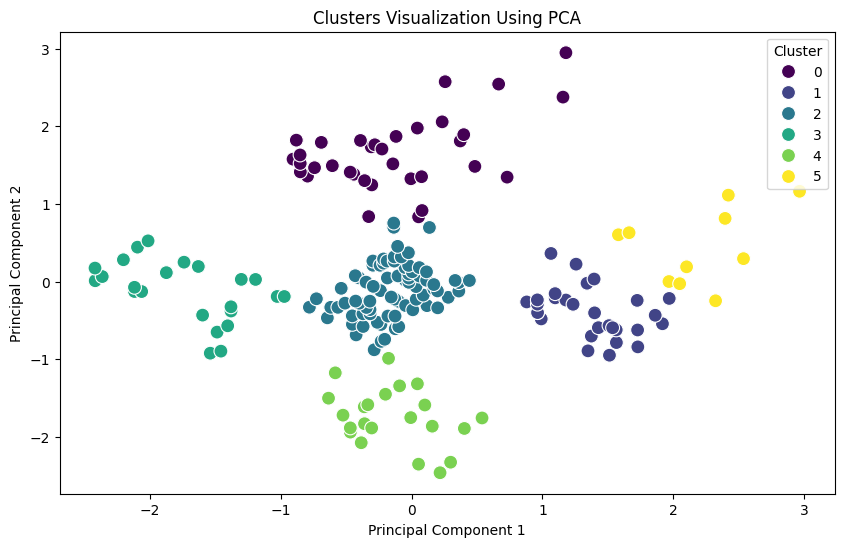

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
customer_data = pd.read_csv("Mall_Customers.csv")

# Display basic data information
print(customer_data.head())
print(customer_data.info())
print(customer_data.describe())

# Summary statistics
print("Summary of Age:", customer_data['Age'].describe())
print("Standard Deviation of Age:", customer_data['Age'].std())
print("Summary of Annual Income:", customer_data['Annual Income (k$)'].describe())
print("Standard Deviation of Annual Income:", customer_data['Annual Income (k$)'].std())
print("Summary of Spending Score:", customer_data['Spending Score (1-100)'].describe())
print("Standard Deviation of Spending Score:", customer_data['Spending Score (1-100)'].std())

# Visualization: Gender distribution
gender_counts = customer_data['Gender'].value_counts()
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Gender Comparison")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Pie chart for gender ratio
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Gender Ratio")
plt.show()

# Visualization: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], kde=False, bins=10, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age Class")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(y=customer_data['Age'], color='#ff0066')
plt.title("Boxplot for Age")
plt.show()

# Annual Income Analysis
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Annual Income (k$)'], kde=False, bins=10, color='#660033')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

# Density plot for Annual Income
plt.figure(figsize=(10, 6))
sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, color='yellow')
plt.title("Density Plot for Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.show()

# Spending Score Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_data['Spending Score (1-100)'], color='#990000')
plt.title("Boxplot for Spending Score")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Spending Score (1-100)'], kde=False, bins=10, color='#6600cc')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score Class")
plt.ylabel("Frequency")
plt.show()

# K-means clustering
X = customer_data.iloc[:, [3, 4]].values

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Using the silhouette score
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg:.4f}")

# Final clustering with optimal K (e.g., K=6)
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=50, random_state=125)
customer_data['Cluster'] = kmeans.fit_predict(X)

# PCA for visualization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
customer_data['PC1'] = principal_components[:, 0]
customer_data['PC2'] = principal_components[:, 1]

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title("Clusters Visualization Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
